In [1]:
%matplotlib inline

import numpy as np # NUMPY
import pandas as pd # PANDAS
import matplotlib.pyplot as plt # MATPLOTLIB
import seaborn as sns # SEABORN
import scipy
import sklearn
from sklearn.decomposition import PCA
import cv2
import os 
from skimage import filters
from scipy import ndimage

# Vamos a escribir un expression map, primero con us Self Organizing Map

In [3]:
b_shape = pd.read_csv('pca_shapepoints.csv',header = None)
b_structure = pd.read_csv('pca_structurepoints.csv',header = None)
b_cartoon = pd.read_csv('pca_cartoonpoints.csv',header = None)
b_texture = pd.read_csv('pca_texturepoints.csv',header = None)

In [2]:
b_shape = pd.read_csv('pca_training_shapepoints.csv',header = None)
b_structure = pd.read_csv('pca_training_structurepoints.csv',header = None)
b_cartoon = pd.read_csv('pca_cartoontrainingpoints.csv',header = None)
b_texture = pd.read_csv('pca_texturetrainingpoints.csv',header = None)

In [3]:
len(b_cartoon)

689

estas 2 celdas están porque no tenemos todas las imagenes del conjunto de entrenamiento todavia

In [4]:
cant_frames_per_seq = pd.read_csv('cktraining_landmark_FramePerSeq.csv',header = None)
cant_frames_per_seq = np.asarray(cant_frames_per_seq).flatten()
cant_frames_per_seq

first_frames = [0]
for i in cant_frames_per_seq:
    current = first_frames[-1] + i
    first_frames.append(current)

In [52]:
first_frames[0:37]

[0,
 14,
 33,
 48,
 64,
 86,
 100,
 121,
 141,
 154,
 184,
 216,
 233,
 248,
 264,
 279,
 292,
 316,
 331,
 350,
 368,
 388,
 410,
 431,
 455,
 469,
 488,
 503,
 533,
 558,
 564,
 580,
 597,
 614,
 632,
 653,
 676]

In [6]:
b_shape = b_shape[0:689]
b_structure = b_structure[0:689]

In [7]:
b_vector = np.concatenate((b_shape, b_structure), axis = 1)
b_vector = np.concatenate((b_vector, b_cartoon), axis = 1)
b_vector = np.concatenate((b_vector, b_texture), axis = 1)

In [8]:
 b_vector.shape

(689, 70)

In [48]:
import glob
my_path = '/home/alicia/Documentos/Tesis2023/SynthesisEmotions/ck+copytraining/Emotion_labels/Emotion'


emotions = []

files = np.sort(glob.glob(my_path + '/**/*.txt', recursive=True))
for file in files:
    with open(file) as f:
        emotion = int(float(f.readline()))
        emotions.append(emotion)
emotions = np.asarray(emotions)

Vamos a buscar las emociones labeleadas, son las numero 0 y 1



In [64]:
b_vectors_labeled = []
target = []
for i in range(0,36):
    co = first_frames[i]
    sa = first_frames[i+1]
    b_vectors_labeled.append(b_vector[co])
    b_vectors_labeled.append(b_vector[sa-1])
    target.append(0)
    target.append(emotions[i])

In [10]:
target son las neuronas 0 y 1 (inicio y fin de frames)


In [11]:
#b_vector = np.concatenate((b_vector, emotion_targets), axis = 1)
#b_vector.shape

In [12]:
target = emotion_targets
label_names ={0: 'Neutral',1:'Anger',2:'Disgust',3:'Fear',4:'Happy',5:'Sadness',6:'Surprise'}

In [13]:
target = target.flatten()
target

array([0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
import minisom
### Initialization and training ###
som = minisom.MiniSom(9,9,70,sigma=1.5,learning_rate=0.2)#hay 8x8 neuronas(64)
som.random_weights_init(b_vector)
print("Training...")
som.train_random(b_vector,2000) # training with 100 iterations
print("\n...ready!")

Training...

...ready!


In [77]:
som.topographic_error(b_vector[:600])



0.04833333333333333

72


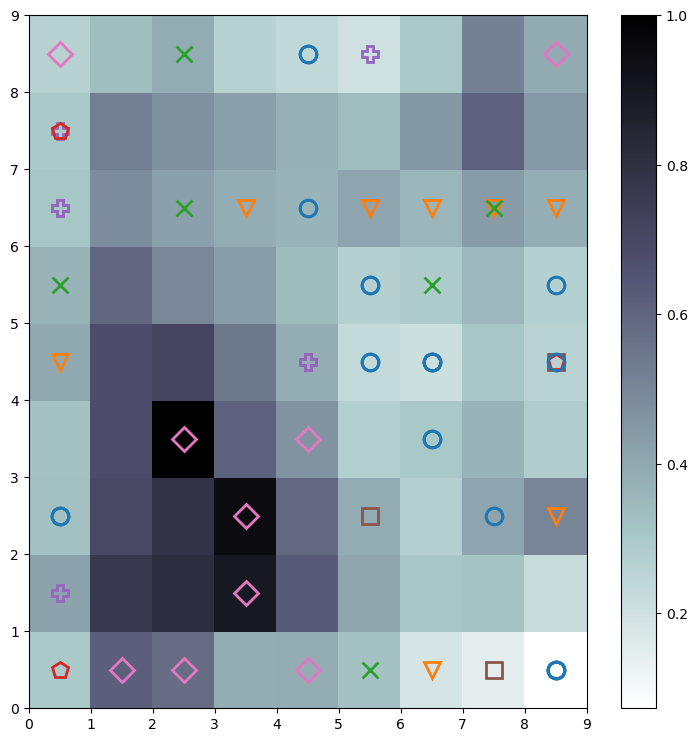

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()


## Plotting the response for each pattern in the iris dataset
## different colors and markers for each label
markers = ['o','v','NO', 'x', 'p', 'P','s','D' ]
colors = ['C0', 'C1', 'NO', 'C2', 'C3', 'C4','C5', 'C6']
for cnt, xx in enumerate(b_vectors_labeled):     
    w = som.winner(xx)  # getting the winner    
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)
print(len(b_vectors_labeled))
plt.show()

In [79]:
dic = som.win_map(b_vectors_labeled,return_indices=True )
emotion_targets = target


counters = []
for key in dic:
    space = np.zeros(len(dic[key]), dtype = int)
    for i in range(0, len(dic[key])):
        val = dic[key]       
        space[i] = emotion_targets[val[i]]
    counters.append(space)

MyDic = {}

for cnt, key in enumerate(dic):
    MyDic[key] = max(counters[cnt])
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


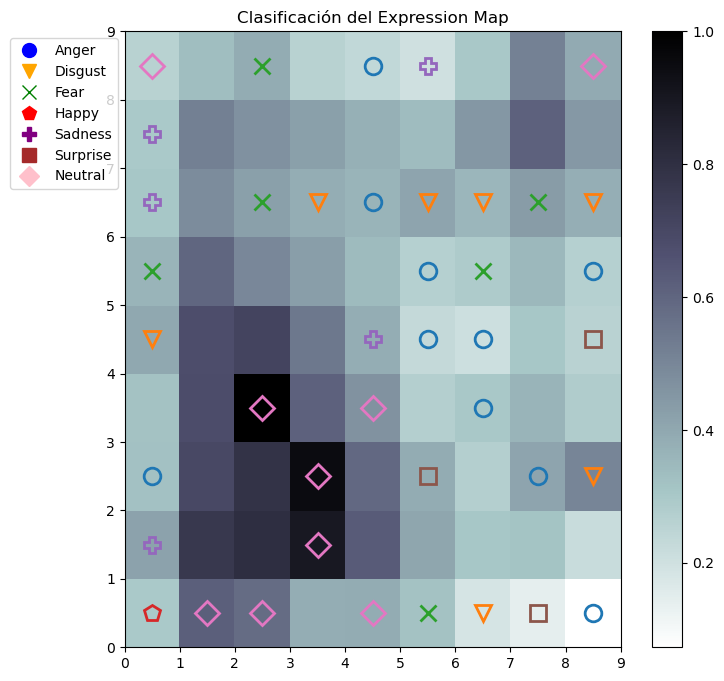

In [148]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 8))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

## Plotting the response for each pattern in the iris dataset
## different colors and markers for each label
blue_star = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='Blue stars')
red_square = mlines.Line2D([], [], color='orange', marker='v', linestyle='None',
                          markersize=10, label='Red squares')
purple_triangle = mlines.Line2D([], [], color='green', marker='x', linestyle='None',
                          markersize=10, label='Purple triangles')
green_star = mlines.Line2D([], [], color='red', marker='p', linestyle='None',
                          markersize=10, label='Blue stars')
orange_square = mlines.Line2D([], [], color='purple', marker='P', linestyle='None',
                          markersize=10, label='Red squares')
yellow_triangle = mlines.Line2D([], [], color='brown', marker='s', linestyle='None',
                          markersize=10, label='Purple triangles')
black_triangle = mlines.Line2D([], [], color='pink', marker='D', linestyle='None',
                          markersize=10, label='Purple triangles')

markersleg = [blue_star, red_square, purple_triangle, green_star, orange_square,yellow_triangle, black_triangle   ]

#markers = [1,2,3,4,5,6,7]
markers = ['o','v', 'x', 'p', 'P','s','D' ]
colors = ['C0', 'C1', 'C2', 'C3', 'C4','C5', 'C6']
lala = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise', 'Neutral'] 
for key in MyDic:
    # palce a marker on the winning position for the sample xx
    w = key  
    sign = MyDic[key]
    if sign > 2:#no hay labels 2 porque las filtramos al hacer la base de dates
        sign = sign -1
    plt.plot(w[0]+.5, w[1]+.5, markers[sign], markerfacecolor='None',
             markeredgecolor=colors[sign], markersize=12, markeredgewidth=2)


plt.legend(handles = markersleg, labels = lala, bbox_to_anchor=(0, 1), loc='upper right', ncol=1)

plt.title('Clasificación del Expression Map')
#b_tuple = tuple(map(tuple, b_vector))
plt.savefig('/home/alicia/Documentos/Tesis2023/SynthesisEmotions/Notebook/expression_map.eps', format='eps')
plt.show()

#som.labels_map(b_vector, emotion_targets.flatten())

In [79]:

MyDic

{(1, 7): 6,
 (7, 0): 6,
 (7, 1): 6,
 (3, 7): 5,
 (4, 7): 5,
 (5, 7): 5,
 (6, 7): 5,
 (7, 7): 5,
 (7, 6): 5,
 (4, 6): 3,
 (5, 5): 3,
 (6, 5): 3,
 (6, 4): 3,
 (7, 4): 3,
 (2, 2): 1,
 (1, 2): 1,
 (0, 3): 1,
 (0, 2): 1,
 (0, 1): 1,
 (0, 0): 1,
 (2, 4): 2,
 (1, 4): 2,
 (1, 5): 2,
 (0, 6): 2,
 (0, 5): 2,
 (3, 5): 4,
 (2, 6): 4,
 (7, 3): 4,
 (4, 1): 6,
 (4, 2): 6,
 (3, 2): 6,
 (3, 3): 6,
 (4, 3): 6,
 (4, 4): 6,
 (4, 0): 5,
 (3, 0): 5,
 (2, 0): 5,
 (5, 1): 0,
 (5, 0): 2}

In [146]:
som.get_weights().shape # las weights finales son los patterns



(8, 8, 86)

In [87]:
np.save('expmaptest.npy', som.get_weights(), allow_pickle=False)

np.save('expmaplabels.npy', MyDic)

In [ ]:
surprise
sadness
fear
anger
disgust
happiness
surprise
sadness
disgust

In [139]:
According to ck+

Anger = 1
Contempt = 2 (no vemos)
Disgust = 3
Fear = 4
Happy = 5
Sadness =6
Surprise =  7

SyntaxError: invalid syntax (1089313241.py, line 1)

In [138]:
som.values

AttributeError: 'MiniSom' object has no attribute 'values'